<a href="https://colab.research.google.com/github/Bedadeepa/DeepLearning/blob/main/simpleNN_housing_data20112022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 29th October, 2022
# California Housing Dataset
# Experiments with NN
# https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 2.0 Mount google drive 
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# 2.1 Read FASHION-MNIST data

path = "/gdrive/MyDrive/Colab_data_file/"


In [ ]:
# 2.2
data = pd.read_csv(path + "housing.csv")

In [ ]:
# 2.2.1
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 2.2.2
data.shape

(20640, 10)

In [ ]:
# 2.3 Pop out target
y = data.pop('median_house_value')

In [ ]:
# 2.3.1
data.shape   # (20640, 9)

(20640, 9)

In [ ]:
# 3.0 Check NULL
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
data['total_bedrooms'].median()

435.0

In [ ]:


# 3.1 Fill null values with 'median'

data['total_bedrooms']= data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [ ]:
# 3.2
data[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY


In [ ]:
# 4.0
# Label encode ocean_proximity:
 
le = LabelEncoder()
le.fit(data['ocean_proximity'])
data['ocean_proximity'] = le.transform(data['ocean_proximity'])

In [ ]:
# 4.1 Check data again:
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3


In [ ]:
# 5.0 Scale data
ss = StandardScaler()
ss.fit(data)
X = ss.transform(data)

In [ ]:

# 5.1
X[:5]

array([[-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
        -0.9744286 , -0.97703285,  2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.35714343,
         0.86143887,  1.66996103,  2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, -0.53574589, -0.82702426,
        -0.82077735, -0.84363692,  1.7826994 ,  1.2910888 ],
       [-1.33781784,  1.03850269,  1.85618152, -0.62421459, -0.71972345,
        -0.76602806, -0.73378144,  0.93296751,  1.2910888 ],
       [-1.33781784,  1.03850269,  1.85618152, -0.46240395, -0.61242263,
        -0.75984669, -0.62915718, -0.012881  ,  1.2910888 ]])

In [ ]:

# 6.0 Split data:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.15)
display(X_train.shape)
display(X_test.shape)

(17544, 9)

(3096, 9)

In [ ]:
len(y_train)

17544

In [ ]:
17544/4

4386.0

In [ ]:
gh= np.array([1,-1,1,-1]*4386)
y_tr = gh.reshape(17544,) * y_train
y_tr

4409     155500.0
20204   -187500.0
5408     353900.0
10505   -500001.0
19371    208300.0
           ...   
18738    -85200.0
2042     121600.0
6147    -141600.0
7713     263200.0
13671    -82100.0
Name: median_house_value, Length: 17544, dtype: float64

In [ ]:
len(y_train)

17544

In [ ]:
se=StandardScaler()
y_tr=se.fit_transform(y_train.values.reshape(-1,1))

In [ ]:
y_tr=y_tr.reshape(17544)

In [ ]:
y_tr

array([-0.84703009,  0.72350103, -1.10821063, ..., -1.05907765,
       -0.85737388, -0.62722469])

In [ ]:
del model

In [ ]:
model=tf.keras.Sequential()  

In [ ]:
model.add(tf.keras.Input(shape=(9,)))

In [ ]:
model.add(tf.keras.layers.Dense(20,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(5,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                200       
                                                                 
 dense_7 (Dense)             (None, 5)                 105       
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


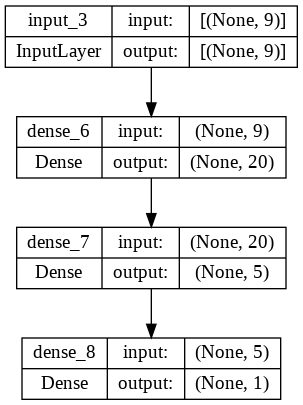

In [ ]:
tf.keras.utils.plot_model(model,show_shapes= True)

In [ ]:
 model.compile(loss='mean_squared_error',
              optimizer = 'rmsprop' ,
              metrics=['mean_squared_error','mean_absolute_error'])

In [ ]:
history= model.fit(X_train,y_tr,epochs=200
                   ,validation_split=0.2)

Epoch 1/200
439/439 [==============================] - 2s 2ms/step - loss: 0.6493 - mean_squared_error: 0.6493 - mean_absolute_error: 0.6644 - val_loss: 0.6038 - val_mean_squared_error: 0.6038 - val_mean_absolute_error: 0.6431
Epoch 2/200
439/439 [==============================] - 1s 2ms/step - loss: 0.5773 - mean_squared_error: 0.5773 - mean_absolute_error: 0.6285 - val_loss: 0.5882 - val_mean_squared_error: 0.5882 - val_mean_absolute_error: 0.6319
Epoch 3/200
439/439 [==============================] - 1s 2ms/step - loss: 0.5602 - mean_squared_error: 0.5602 - mean_absolute_error: 0.6182 - val_loss: 0.5695 - val_mean_squared_error: 0.5695 - val_mean_absolute_error: 0.6238
Epoch 4/200
439/439 [==============================] - 1s 2ms/step - loss: 0.5494 - mean_squared_error: 0.5494 - mean_absolute_error: 0.6115 - val_loss: 0.5555 - val_mean_squared_error: 0.5555 - val_mean_absolute_error: 0.6156
Epoch 5/200
439/439 [==============================] - 1s 2ms/step - loss: 0.5416 - mean_squ

In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])

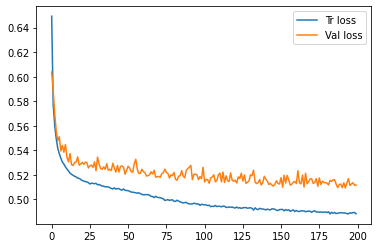

In [ ]:
plt.plot(history.history['loss'], label = "Tr loss")
plt.plot(history.history['val_mean_a_error'],label="Val loss")
plt.legend();

## Model

In [ ]:
# 6.0
model = tf.keras.Sequential()

In [ ]:
# 6.1
model.add( tf.keras.layers.Input(shape = (9,) ))

In [ ]:
# 6.2 Start 
model.add(tf.keras.layers.Dense(40, activation = 'relu'))  # MAke it 5 and then 20 (not more or less)

In [ ]:
# 6.2.1 Experiment with adding a dropout layer
#       but then increase number of units in Dense layer from 20 to 40
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [ ]:
model.add(tf.keras.layers.Dense(20, activation = 'relu'))  
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [ ]:
model.add(tf.keras.layers.Dense(10, activation = 'relu'))  
#model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [ ]:
# 6.3 Experiment first with activation of sigmoid
#     and then no activation function
model.add(tf.keras.layers.Dense(1))    # Keep sigmoid; then remove sigmoid

In [ ]:
# 6.4 Model summary:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 40)                400       
                                                                 
 dropout_6 (Dropout)         (None, 40)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                820       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-traina

In [ ]:
# 6.5 Compile model
#     Expt with adam
model.compile(
                 loss = 'mae',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference 
                 metrics = ['mae']

              )

In [ ]:
# 7.0
history = model.fit(X_train,y_train,
                    epochs = 70,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/70
549/549 [==============================] - 2s 3ms/step - loss: 202302.9844 - mae: 202302.9844 - val_loss: 185277.0000 - val_mae: 185277.0000
Epoch 2/70
549/549 [==============================] - 2s 3ms/step - loss: 133477.3438 - mae: 133477.3438 - val_loss: 92973.9141 - val_mae: 92973.9141
Epoch 3/70
549/549 [==============================] - 1s 2ms/step - loss: 95824.3281 - mae: 95824.3281 - val_loss: 75812.4375 - val_mae: 75812.4375
Epoch 4/70
549/549 [==============================] - 1s 3ms/step - loss: 85449.5078 - mae: 85449.5078 - val_loss: 67652.8359 - val_mae: 67652.8359
Epoch 5/70
549/549 [==============================] - 1s 3ms/step - loss: 81122.1172 - mae: 81122.1172 - val_loss: 62249.5312 - val_mae: 62249.5312
Epoch 6/70
549/549 [==============================] - 1s 3ms/step - loss: 77531.3906 - mae: 77531.3906 - val_loss: 58334.4766 - val_mae: 58334.4766
Epoch 7/70
549/549 [==============================] - 1s 3ms/step - loss: 74600.5938 - mae: 74600.5938 - v

In [ ]:
# 7.1
model.evaluate(X_test,y_test)

97/97 [==============================] - 0s 2ms/step - loss: 0.6292 - mae: 0.6292


[0.6291962265968323, 0.6291962265968323]

In [ ]:
######################### I am done #################